In [7]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import sys
import time as ti

import numpy as np

In [2]:
import os
file = 'station_info.txt'


In [3]:
clients = ['IRIS']


# Define parameters
time = UTCDateTime('1994-01-01T00:00:00.001')

starttime = time
endtime = UTCDateTime('2022-01-01T00:00:00.001')
# net = "NC"
net = "C*"
stn = "*"
channel = "*"
count = 0
# success = False
lst = []

# Timing the code execution
start = ti.time()
for cl in clients:
    try:
        print(f"--> Trying for client: {cl}")
        client = Client(cl)

        inventory = client.get_stations(network=net, station=stn, channel=channel,
                                        minlatitude = 32.5, maxlatitude = 34.5,
                                        minlongitude = -119.75, maxlongitude = -114.9,
                                        level="response", starttime=starttime, endtime=endtime)
        

        f_path = os.path.join(os.getcwd(), cl + '_' + file)
        
        if inventory not in lst:
            print(inventory)
            
            lst.append(inventory)
            inventory.write(f_path, format='STATIONTXT',level='station')
            
        end = ti.time()
            
            
        print(f"The program took {end-start} seconds to run")

    except:
        print(f'Failed to try ---- {cl} \n', sys.exc_info())

        
    count += 1

--> Trying for client: IRIS
Inventory created at 2022-11-29T07:42:13.266500Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=1994-01-01...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CI
		Stations (368):
			CI.ACP (Agua Caliente County Park)
			CI.AGA (Agave Hill)
			CI.AGO (Agoura)
			CI.AVC (Avalon Canyon)
			CI.BAC (Bachelor Mountain)
			CI.BAR (Barrett)
			CI.BBR (Big Bear Solar Observatory)
			CI.BBS (Beaumont Base)
			CI.BC3 (Big Chuckawalla Mtns)
			CI.BCC (Bear Creek Country Club)
			CI.BEL (Belle Mountain Joshua Tree)
			CI.BFS (Mt. Baldy Ranger Station)
			CI.BHP (Baldwin Hills)
			CI.BLA (Blackrock Canyon Campground)
			CI.BLA2 (Black Rock Canyon Campground 2)
			CI.BLC (Black Canyon)
			CI.BOM (Bombay Beach)
			CI.BOR (Borrego Springs)
			CI.BRE (Barre)
			CI.BTC (Brunts Corner)
			CI.BTL (Butler Peak)
			CI.CAC (Caltech Athenaeum Cellar)
			CI.CALB (Calabasas)
			CI.C

In [4]:
"""RETURN THE SHORTEST DISTANCE BETWEEN 2 POINTS GIVEN LONG LAT"""

from math import sin, cos, sqrt, atan2, radians
def dist(point1, point2):
    # approximate radius of earth in km
    R = 6373.0
    lat1 = radians(point1[1])
    lon1 = radians(point1[0])
    lat2 = radians(point2[1])
    lon2 = radians(point2[0])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

# Naming station file
stafile = os.path.join(os.getcwd(), 'IRIS_station_info.txt')
# Naming earthquakes file
eqfile = os.path.join(os.getcwd(), 'earthquakes.csv')

df_stations = pd.read_csv(stafile, sep = '|')

df_eq = pd.read_csv(eqfile)

eq_mag = df_eq["Magnitude"].tolist()
eq_depth = df_eq["depth (km)"].tolist()






In [2]:
eq_lat = df_eq["lat"].tolist()
eq_long = df_eq["long"].tolist()

sta_lat = df_stations["Latitude"].tolist()
sta_long = df_stations["Longitude"].tolist()

point1 = [[i,j] for i,j in zip(eq_lat,eq_long)]
point2 = [[i,j] for i,j in zip(sta_lat,sta_long)]


In [22]:
point1[1745]

[33.091, 60.375]

In [26]:
len(point1)

6747

In [23]:
point2[1745]

IndexError: list index out of range

In [5]:
closest_dist = []
for pt1 in point1:
    shortest = None
    for sta in range(len(point2)):
        distance = dist(pt1, point2[sta])
        if shortest is None:

            shortest = distance 

            continue
        elif distance <= shortest:
            shortest = distance
            continue

        else:
            continue
    closest_dist.append(shortest)

In [25]:
len(closest_dist)

6747

In [21]:
closest_dist.index(max(closest_dist))

1745

In [8]:
scaled = np.sqrt(np.power(closest_dist,2) + np.power(eq_depth,2))

In [ ]:
type closest

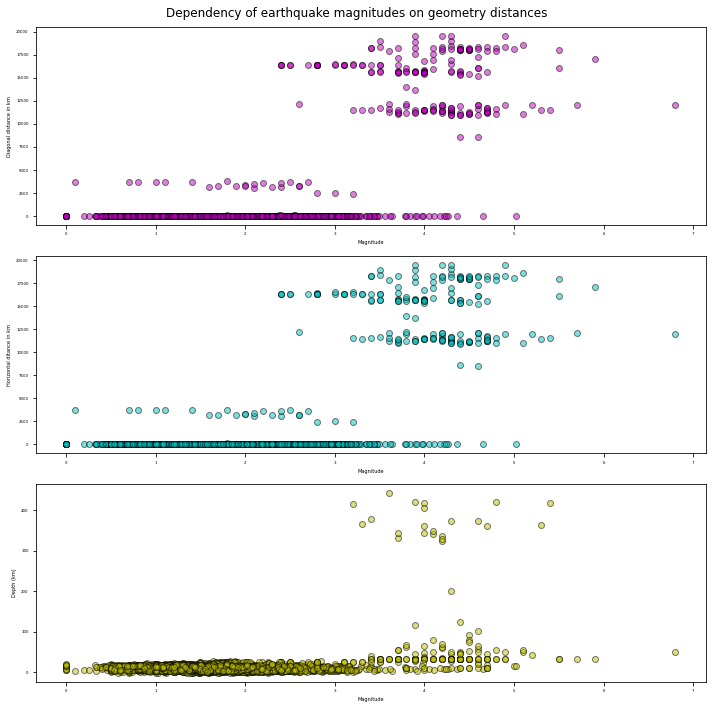

In [9]:
"""PLOTTING DATA ANALYSIS"""

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1)
fig.set_figheight(10)
fig.set_figwidth(10)


ax1.plot(eq_mag, scaled, marker='o', color='m', markeredgecolor='black',
alpha = 0.5, linestyle='none')

ax1.set_xlabel("Magnitude", fontsize = 5)
ax1.set_ylabel("Diagonal distance in km", fontsize=5)
# Plotting eq_mag to closest dist which is the horizontal distance

ax2.plot(eq_mag, closest_dist, marker='o', color='c', markeredgecolor='black',
alpha = 0.5, linestyle = 'none')

ax2.set_xlabel("Magnitude", fontsize = 5)
ax2.set_ylabel("Horizontal ditance in km", fontsize=5)

# Plotting eq_mag to depth

ax3.plot(eq_mag, eq_depth, marker='o', color='y', markeredgecolor='black',
alpha = 0.5, linestyle='none')

ax3.set_xlabel("Magnitude", fontsize = 5)
ax3.set_ylabel("Depth (km)", fontsize=5)


# Resizing tick marks

ax1.tick_params(axis='both', which='major', labelsize=4)
ax2.tick_params(axis='both', which='major', labelsize=4)
ax3.tick_params(axis='both', which='major', labelsize=4)

plt.suptitle("Dependency of earthquake magnitudes on geometry distances")

fname = os.path.join(os.getcwd(), 'Eathquakes.jpg')
plt.savefig(fname, dpi=200, format = 'jpg')

plt.tight_layout()
plt.show()

In [27]:
max(df_eq["depth (km)"])

445.6

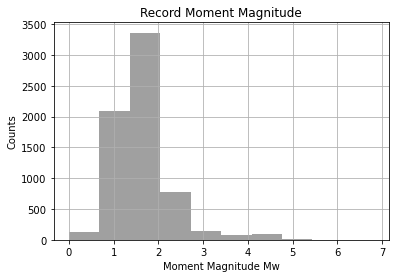

In [11]:
fix, ax = plt.subplots()

# Setting figure size
fig.set_figheight(10)
fig.set_figwidth(10)

plt.hist(eq_mag, density=False, facecolor='grey', alpha = 0.75)

ax.set_xlabel('Moment Magnitude Mw')
ax.set_ylabel('Counts')

plt.grid(which='major')
plt.title("Record Moment Magnitude")
plt.show()



In [7]:
df.head()

,#Network,Station,Latitude,Longitude,Elevation,SiteName,StartTime,EndTime
0,CI,ACP,32.954600,-116.303380,392.25,Agua Caliente County Park,2014-12-31T00:00:00,NaN
1,CI,AGA,33.638378,-116.401100,809.00,Agave Hill,1999-11-16T00:00:00,2005-05-11T00:00:00
2,CI,AGO,34.146470,-118.766990,259.00,Agoura,1995-10-24T00:00:00,NaN
3,CI,AVC,33.333118,-118.335424,0.00,Avalon Canyon,2015-09-17T12:00:00,NaN
4,CI,BAC,33.612200,-117.040600,551.00,Bachelor Mountain,1993-12-14T00:00:00,NaN
